In [4]:
# import necessary tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

# clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

In [14]:
data = pd.read_excel("Credit_Card.xlsx")

In [15]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [8]:
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [9]:
data.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [ ]:
#Customer key - Identifier for the customer
#Average Credit Limit - Average credit limit across all the credit cards
#Total credit cards - Total number of credit cards
#Total visits bank - Total number of bank visits
#Total visits online - total number of online visits
#Total calls made - Total number of calls made by the customer

In [ ]:
# Customer key and SI_No we can drop

In [16]:
data = data.drop('Sl_No', 1)
data = data.drop('Customer Key', 1)

In [17]:
data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [18]:
# normalize the data
# normalize values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled.shape

(660, 5)

In [19]:
data_imputed = pd.DataFrame(data_scaled, columns=data.columns)

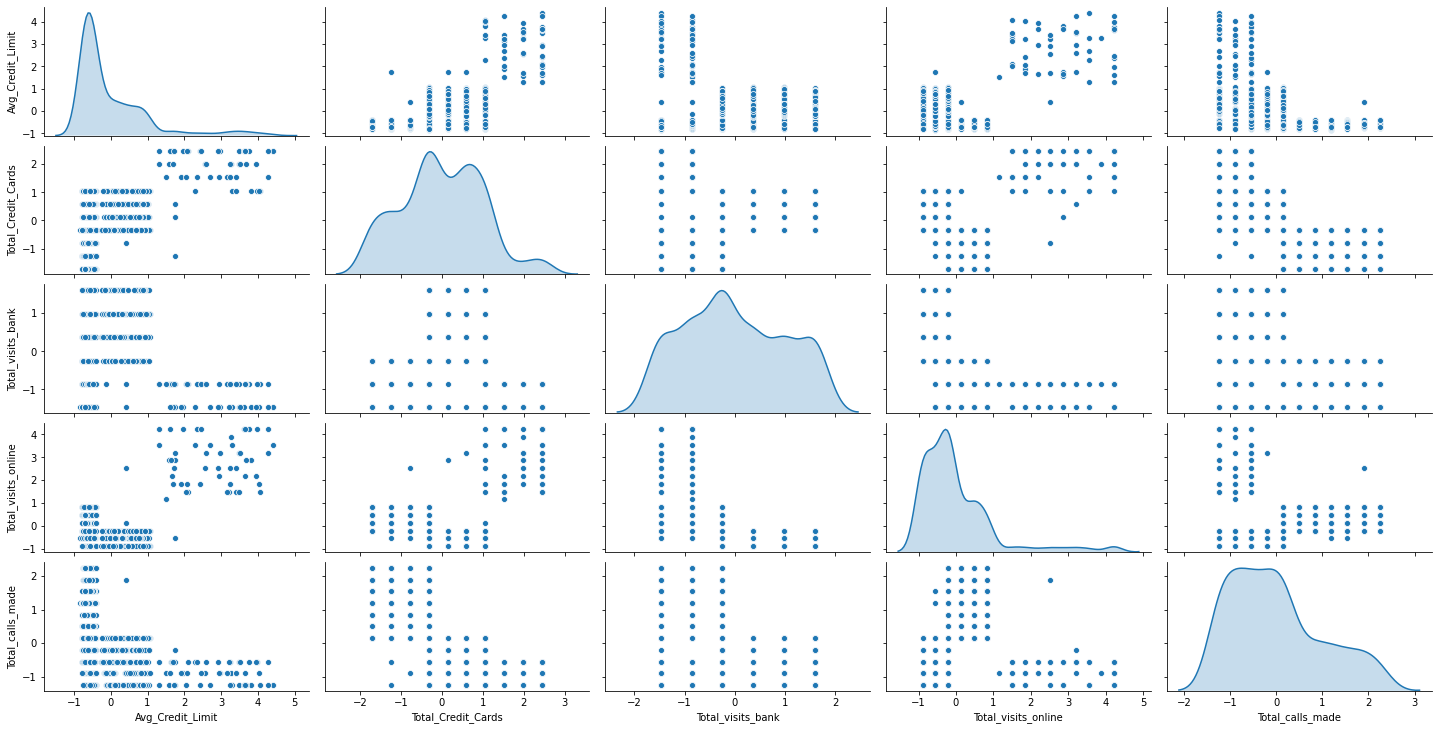

In [51]:
sns.pairplot(data_imputed, height=2,aspect=2 , diag_kind='kde')


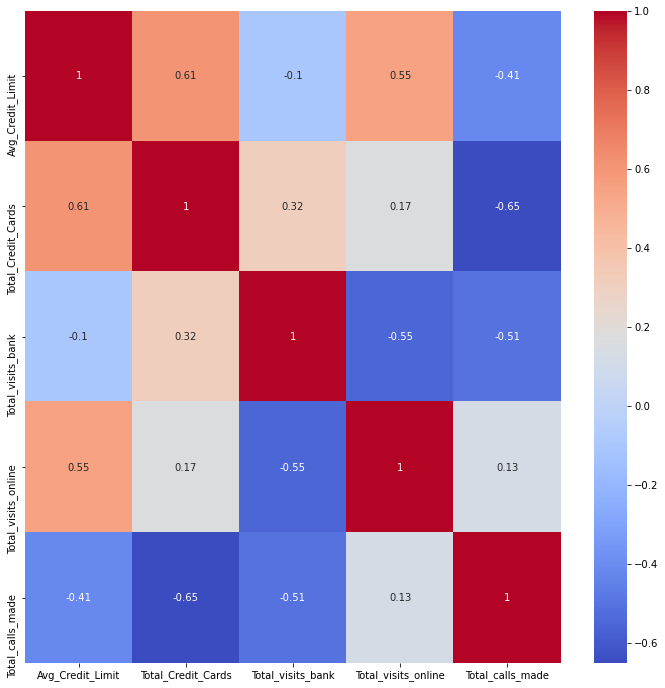

In [20]:
#start clustering...
plt.figure(figsize = (12, 12))
sns.heatmap(data_imputed.corr(), annot=True, cmap='coolwarm', 
            xticklabels=data_imputed.columns,
            yticklabels=data_imputed.columns)

In [21]:
corrm = data_imputed.corr()
corrm


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


In [22]:
eigen_values = np.linalg.eigvals(corrm)
eigen_values_cumvar = (eigen_values/5).cumsum()
eigen_values_cumvar

array([0.45736578, 0.83163061, 0.88041772, 0.93598652, 1.        ])

In [24]:
from factor_analyzer import FactorAnalyzer

In [28]:
FA=FactorAnalyzer()
FA.n_factors=5
FA.rotation='varimax'
FA.method='ml'
FA.fit(data_imputed)

FactorAnalyzer(method='ml', n_factors=5, rotation='varimax', rotation_kwargs={})

In [29]:
loadings=pd.DataFrame(FA.loadings_,index=data_imputed.columns,columns=['Factor 1','Factor 2','Factor 3','Factor 4','Factor 5'])
loadings

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Avg_Credit_Limit,0.679095,0.486157,0.0,0.0,0.0
Total_Credit_Cards,0.819094,0.028278,0.0,0.0,0.0
Total_visits_bank,0.371057,-0.696088,0.0,0.0,0.0
Total_visits_online,0.159483,0.798324,0.0,0.0,0.0
Total_calls_made,-0.758752,0.276342,0.0,0.0,0.0


In [30]:
# inertia plotter function
def inertia_plot(clust, X, start = 2, stop = 20):
    inertia = []
    for x in range(start,stop):
        km = clust(n_clusters = x)
        labels = km.fit_predict(X)
        inertia.append(km.inertia_)
    plt.figure(figsize = (12,6))
    plt.plot(range(start,stop), inertia, marker = 'o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Inertia plot with K')
    plt.xticks(list(range(start, stop)))
    plt.show()

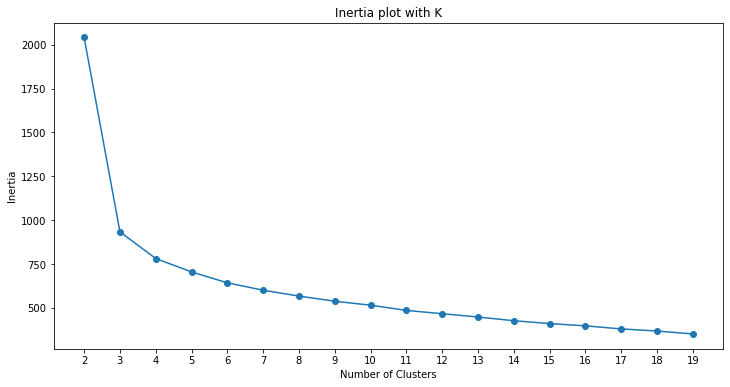

In [31]:

inertia_plot(KMeans, data_imputed)

In [ ]:
#Using the elbow method, we pick a good number of clusters to be 3.

In [34]:
def silh_samp_cluster(clust,  X, start=2, stop=5, metric = 'euclidean'):
    # taken from sebastian Raschkas book Python Machine Learning second edition
    for x in range(start, stop):
        km = clust(n_clusters = x)
        y_km = km.fit_predict(X)
        cluster_labels = np.unique(y_km)
        n_clusters = cluster_labels.shape[0]
        silhouette_vals = silhouette_samples(X, y_km, metric = metric)
        y_ax_lower, y_ax_upper =0,0
        yticks = []
        for i, c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[y_km == c]
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)
            color = cm.jet(float(i)/n_clusters)
            plt.barh(range(y_ax_lower, y_ax_upper),
                    c_silhouette_vals,
                    height=1.0,
                    edgecolor='none',
                    color = color)
            yticks.append((y_ax_lower + y_ax_upper)/2.)
            y_ax_lower+= len(c_silhouette_vals)

        silhouette_avg = np.mean(silhouette_vals)
        plt.axvline(silhouette_avg,
                   color = 'red',
                   linestyle = "--")
        plt.yticks(yticks, cluster_labels+1)
        plt.ylabel("cluster")
        plt.xlabel('Silhouette Coefficient')
        plt.title('Silhouette for ' + str(x) + " Clusters")
        plt.show()

In [32]:
for x in range(2, 7):
    alg = KMeans(n_clusters = x, )
    label = alg.fit_predict(data_imputed)
    print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data_imputed, label))

Silhouette-Score for 2 Clusters:  0.41842496663215445
Silhouette-Score for 3 Clusters:  0.5157182558881063
Silhouette-Score for 4 Clusters:  0.3556670619372605
Silhouette-Score for 5 Clusters:  0.2726898791817692
Silhouette-Score for 6 Clusters:  0.2556621450606854


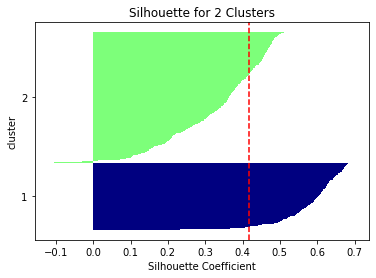

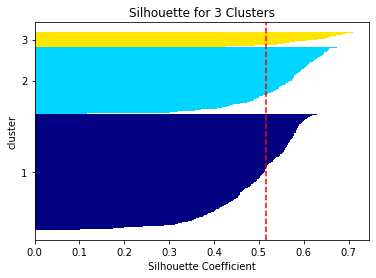

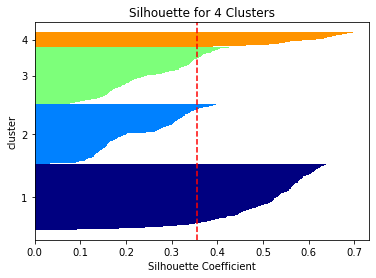

In [36]:
silh_samp_cluster(KMeans, data_imputed, stop=5)


In [37]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    plt.figure(figsize=(15,10))
    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

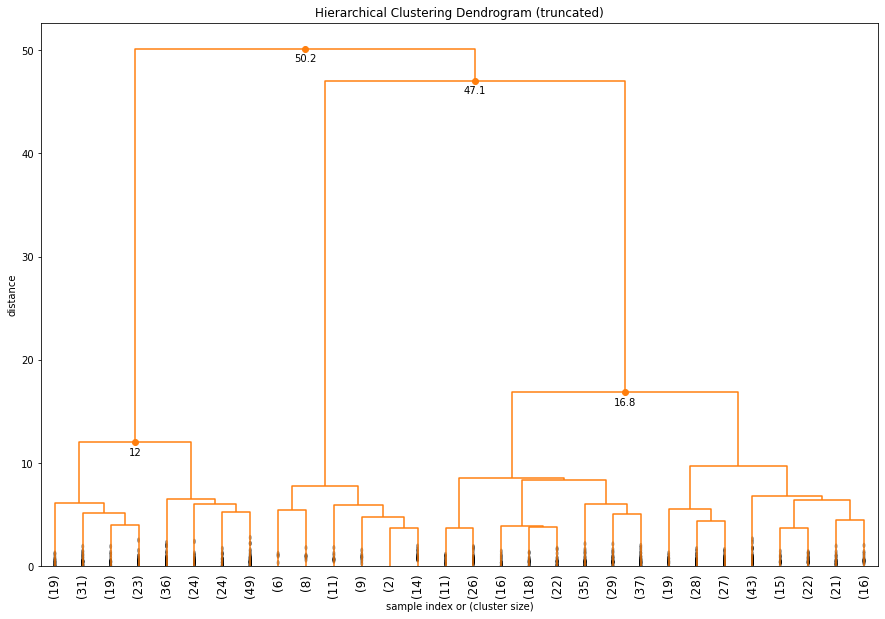

In [38]:
from scipy.cluster.hierarchy import dendrogram, ward

linked_array = ward(data_imputed)

fancy_dendrogram(
    linked_array,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=80
)

plt.show()


In [41]:
# apply PCA and display clustering metrics
for y in range(2, 5):
    print("PCA with # of components: ", y)
    pca = PCA(n_components=y)
    data_p = pca.fit_transform(data_imputed)
    for x in range(2, 6):
        alg = KMeans(n_clusters = x, )
        label = alg.fit_predict(data_p)
        print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data_p, label) , '       Inertia: ',alg.inertia_)
    print()

PCA with # of components:  2
Silhouette-Score for 2 Clusters:  0.5561616946252206        Inertia:  1486.3226616576073
Silhouette-Score for 3 Clusters:  0.682864147486948        Inertia:  381.3129938843185
Silhouette-Score for 4 Clusters:  0.4691603714050247        Inertia:  298.1751219804831
Silhouette-Score for 5 Clusters:  0.3825689061917709        Inertia:  249.91924377985947

PCA with # of components:  3
Silhouette-Score for 2 Clusters:  0.4898075342287057        Inertia:  1697.4896364501956
Silhouette-Score for 3 Clusters:  0.6037083469531257        Inertia:  591.5785451491536
Silhouette-Score for 4 Clusters:  0.4250192948433866        Inertia:  466.67805092262336
Silhouette-Score for 5 Clusters:  0.344987844368572        Inertia:  398.64865705983243

PCA with # of components:  4
Silhouette-Score for 2 Clusters:  0.44590480512702185        Inertia:  1880.5064880158088
Silhouette-Score for 3 Clusters:  0.5505811761988302        Inertia:  773.7281632647087
Silhouette-Score for 4 Clu

Text(0, 0.5, 'PC2')

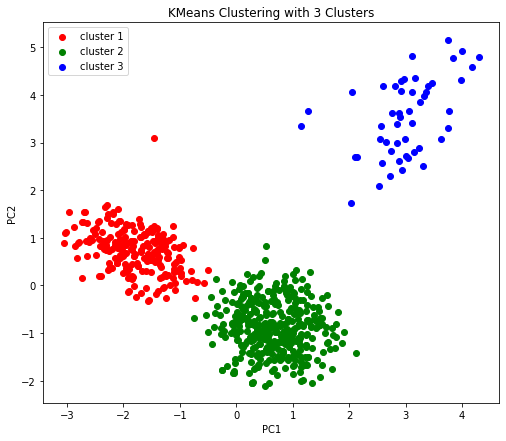

In [46]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(KMeans(n_clusters = 3,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
plt.subplot(121)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.legend()
plt.title('KMeans Clustering with 3 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

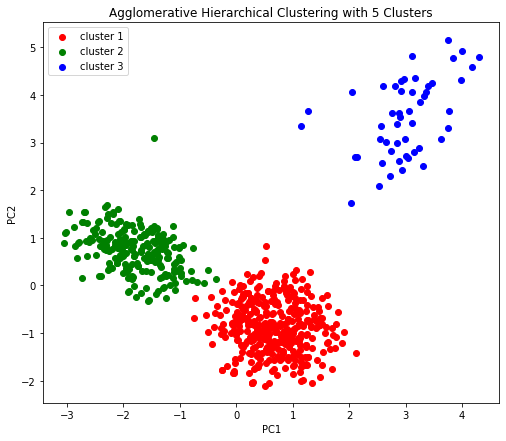

In [47]:
#Agglomerative Hierarchical Clustering with PCA
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(AgglomerativeClustering(n_clusters = 3,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
plt.subplot(121)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.legend()
plt.title('Agglomerative Hierarchical Clustering with 3 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


In [44]:
# select best columns


best_cols = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made"]

# dataframe with best columns
data_final = pd.DataFrame(data_imputed[best_cols])

print('New dataframe with best columns has just been created. Data shape: ' + str(data_final.shape))

New dataframe with best columns has just been created. Data shape: (660, 5)


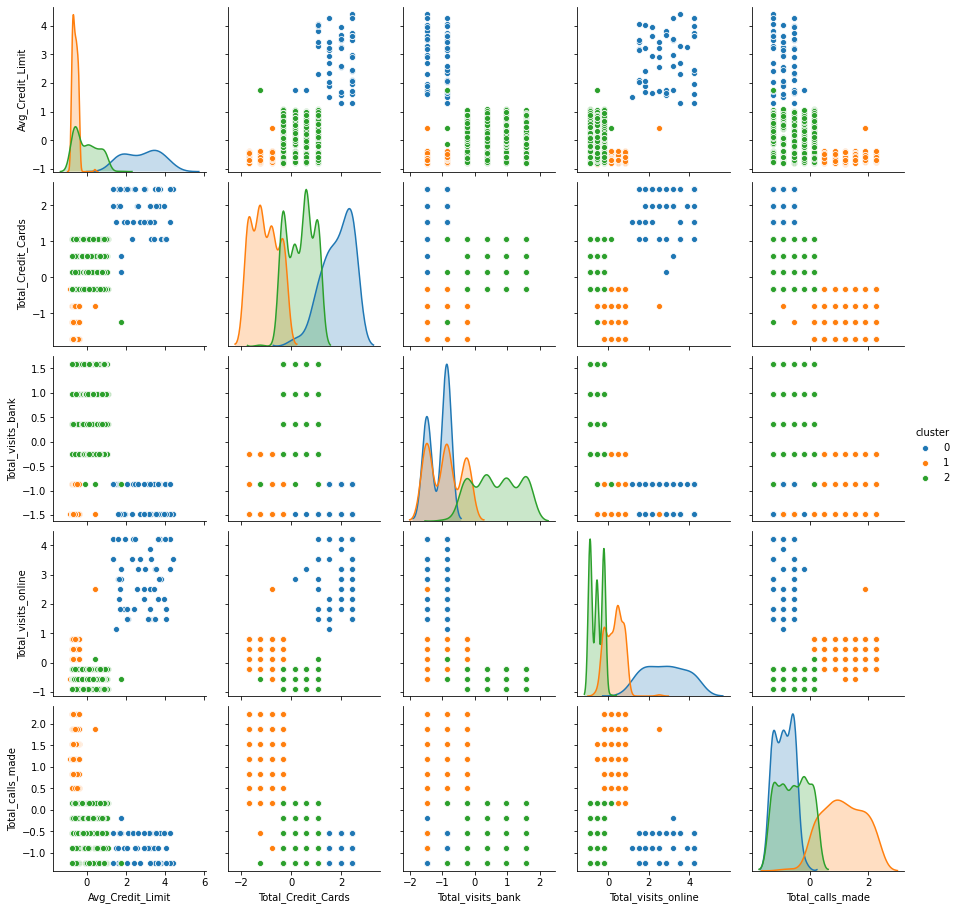

In [45]:
# apply KMeans clustering
alg = KMeans(n_clusters = 3)
label = alg.fit_predict(data_final)

# create a 'cluster' column
data_final['cluster'] = label
best_cols.append('cluster')

# make a Seaborn pairplot
sns.pairplot(data_final[best_cols], hue='cluster')

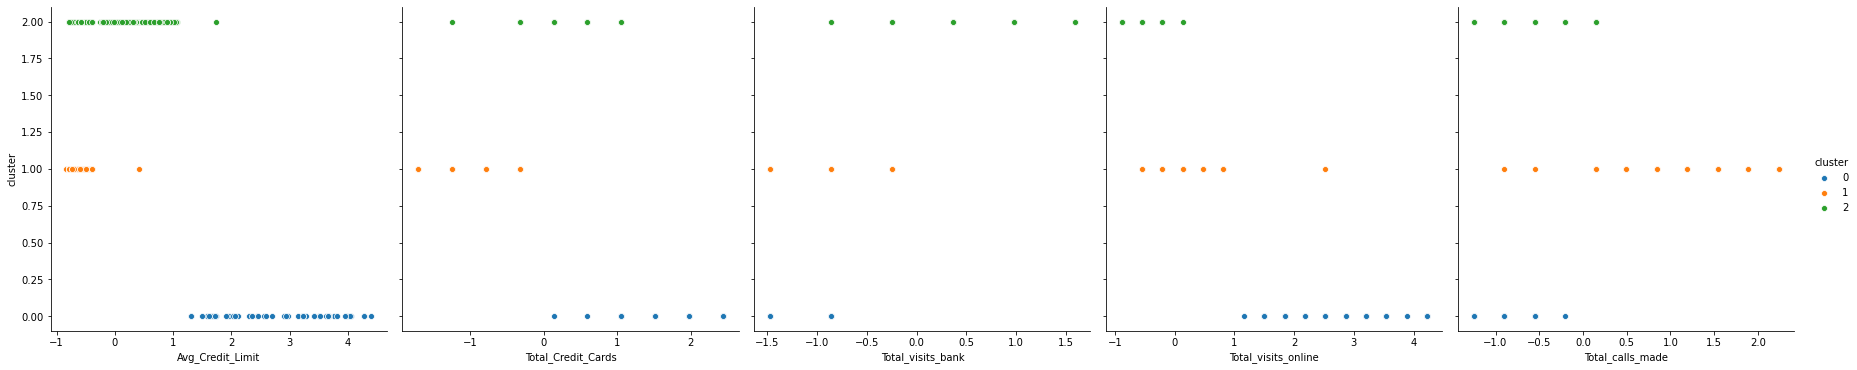

In [50]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made"],
            y_vars=['cluster'],
            height=5, aspect=1)

In [ ]:
#There are basically 3 customer groups
Low - They have low credit limit , no of cards , less visits and less calls made
Medium - They use more than lower tier but less customer of having high usage.
High - High credit limit, high no of cards, high visits, high calls.

Bank can target low credit card usage group to increase the buisness.
People having high credit usage they visit online more frequently.
People having high credit limit has high number of cards as well.
People having low credit limit make frequent calls for queries.


